# 1. Đọc và làm sạch dữ liệu

In [ ]:
import os
import re
import time
import numpy as np
import pandas as pd
import tensorflow as tf

# 1.1 Đọc dữ liệu

Link data: https://nlp.stanford.edu/projects/nmt/

In [ ]:
ROOT_DATA = '/data'

In [ ]:
def getData(file_name_en, file_name_vi):
    path_en = os.path.join(ROOT_DATA, file_name_en)     # lấy đường dẫn của file en
    path_vi = os.path.join(ROOT_DATA, file_name_vi)     # lấy đường dẫn của file vi
    with open(path_en,'r',encoding='utf-8') as f:
        en = f.read().splitlines()
    f.close()
    with open(path_vi,'r',encoding='utf-8') as f:
        vi = f.read().splitlines()
    f.close()
    return pd.DataFrame(zip(en,vi), columns=['English', 'Vietnamese'])

In [ ]:
df_train = getData('train.en', 'train.vi')
df_tst2012 = getData('tst2012.en', 'tst2012.vi')
df_tst2013 = getData('tst2013.en', 'tst2013.vi')

In [ ]:
df_train

,English,Vietnamese
0,Rachel Pike : The science behind a climate hea...,Khoa học đằng sau một tiêu đề về khí hậu
1,"In 4 minutes , atmospheric chemist Rachel Pike...","Trong 4 phút , chuyên gia hoá học khí quyển Ra..."
2,I &apos;d like to talk to you today about the ...,Tôi muốn cho các bạn biết về sự to lớn của nhữ...
3,Headlines that look like this when they have t...,Có những dòng trông như thế này khi bàn về biế...
4,They are both two branches of the same field o...,Cả hai đều là một nhánh của cùng một lĩnh vực ...
...,...,...
133312,I want to end by saying it &apos;s been the ac...,Tôi muốn kết luận rằng hành động của hàng ngàn...
133313,Thank you very much for your time .,Rất cảm ơn đã lắng nghe .
133314,,
133315,Didier Sornette : How we can predict the next ...,Paul Pholeros : Làm sao để bớt nghèo khổ ? Hãy...


In [ ]:
df_tst2012

,English,Vietnamese
0,How can I speak in 10 minutes about the bonds ...,Làm sao tôi có thể trình bày trong 10 phút về ...
1,This is not a finished story .,Câu chuyện này chưa kết thúc .
2,It is a jigsaw puzzle still being put together .,Nó là một trò chơi ghép hình vẫn đang được xếp .
3,Let me tell you about some of the pieces .,Hãy để tôi kể cho các bạn về vài mảnh ghép nhé .
4,Imagine the first piece : a man burning his li...,Hãy tưởng tượng mảnh đầu tiên : một người đàn ...
...,...,...
1548,This is not a question between privacy against...,Đây không phải là vấn đề giữa quyền riêng tư v...
1549,It &apos;s a question of freedom against contr...,Đây là một vấn đề giữa tự do và sự kiểm soát .
1550,And while we might trust our governments right...,Và trong khi chúng ta vẫn tin tưởng vào chính ...
1551,"And do we trust , do we blindly trust , any fu...","Và liệu chúng ta có còn tin tưởng , một cách m..."


In [ ]:
df_tst2013

,English,Vietnamese
0,"When I was little , I thought my country was t...","Khi tôi còn nhỏ , Tôi nghĩ rằng BắcTriều Tiên ..."
1,And I was very proud .,Tôi đã rất tự hào về đất nước tôi .
2,"In school , we spent a lot of time studying th...","Ở trường , chúng tôi dành rất nhiều thời gian ..."
3,Although I often wondered about the outside wo...,Mặc dù tôi đã từng tự hỏi không biết thế giới ...
4,"When I was seven years old , I saw my first pu...","Khi tôi lên 7 , tôi chứng kiến cảnh người ta x..."
...,...,...
1263,"I truly believe , if we can see one another as...","Tôi thực sự tin , nếu ta coi người khác như nh..."
1264,These images are not of issues . They are of p...,Những tấm hình không phải là về bản thân vấnđề...
1265,There is not a day that goes by that I don &ap...,Không có ngày nào mà tôi không nghĩ về những n...
1266,I hope that these images awaken a force in tho...,Tôi hi vọng những tấm hình sẽ đánh thức một ng...


## 1.2 Làm sạch dữ liệu

In [ ]:
!pip install pyvi --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.8 MB/s eta 0:00:00


In [ ]:
#from underthesea import word_tokenize
from pyvi import ViTokenizer

In [ ]:
def make_clean_text_vi(text_to_clean):
    res = text_to_clean.lower()
    res = re.sub(r'[!“”"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]', '', res)
    res = re.sub(r'\s+', ' ', res).strip()
    res = ViTokenizer.tokenize(res)
    return res

In [ ]:
def make_clean_text_en(text_to_clean):
    res = text_to_clean.lower()
    res = re.sub(r"i'm", "i am", res)
    res = re.sub(r"he's", "he is", res)
    res = re.sub(r"she's", "she is", res)
    res = re.sub(r"it's", "it is", res)
    res = re.sub(r"that's", "that is", res)
    res = re.sub(r"what's", "what is", res)
    res = re.sub(r"where's", "where is", res)
    res = re.sub(r"how's", "how is", res)
    res = re.sub(r"\'ll", " will", res)
    res = re.sub(r"\'ve", " have", res)
    res = re.sub(r"\'re", " are", res)
    res = re.sub(r"\'d", " would", res)
    res = re.sub(r"\'re", " are", res)
    res = re.sub(r"won't", "will not", res)
    res = re.sub(r"can't", "cannot", res)
    res = re.sub(r"n't", " not", res)
    res = re.sub(r"n'", "ng", res)
    res = re.sub(r"'bout", "about", res)
    res = re.sub(r"'til", "until", res)
    res = re.sub(r'[!“”"#$%&\()*+,-./:;<=>?@[\]^_`{|}~]', "", res)
    res = re.sub(r'\s+', ' ', res).strip()
    return res

In [ ]:
# Tiền xử lý dữ liệu
df_train['English'] = df_train['English'].apply(make_clean_text_en)
df_train['Vietnamese'] = df_train['Vietnamese'].apply(make_clean_text_vi)

df_tst2012['English'] = df_tst2012['English'].apply(make_clean_text_en)
df_tst2012['Vietnamese'] = df_tst2012['Vietnamese'].apply(make_clean_text_vi)

df_tst2013['English'] = df_tst2013['English'].apply(make_clean_text_en)
df_tst2013['Vietnamese'] = df_tst2013['Vietnamese'].apply(make_clean_text_vi)

In [ ]:
df_train

,English,Vietnamese
0,rachel pike the science behind a climate headline,khoa_học đằng sau một tiêu_đề về khí_hậu
1,in 4 minutes atmospheric chemist rachel pike p...,trong 4 phút chuyên_gia hoá_học khí_quyển rach...
2,i aposd like to talk to you today about the sc...,tôi muốn cho các bạn biết về sự to_lớn của nhữ...
3,headlines that look like this when they have t...,có những dòng trông như thế này khi bàn về biế...
4,they are both two branches of the same field o...,cả hai đều là một nhánh của cùng một lĩnh_vực ...
...,...,...
133312,i want to end by saying it aposs been the acti...,tôi muốn kết_luận rằng hành_động của hàng ngàn...
133313,thank you very much for your time,rất cảm_ơn đã lắng_nghe
133314,,
133315,didier sornette how we can predict the next fi...,paul pholeros làm_sao để bớt nghèo_khổ hãy sửa...


In [ ]:
# đếm số lượng token (word) trong câu
countToken = lambda text: len(text.split())

df_train['Count (En)'] = df_train['English'].apply(countToken)
df_train['Count (Vi)'] = df_train['Vietnamese'].apply(countToken)
df_train

,English,Vietnamese,Count (En),Count (Vi)
0,rachel pike the science behind a climate headline,khoa_học đằng sau một tiêu_đề về khí_hậu,8,7
1,in 4 minutes atmospheric chemist rachel pike p...,trong 4 phút chuyên_gia hoá_học khí_quyển rach...,45,50
2,i aposd like to talk to you today about the sc...,tôi muốn cho các bạn biết về sự to_lớn của nhữ...,26,24
3,headlines that look like this when they have t...,có những dòng trông như thế này khi bàn về biế...,29,24
4,they are both two branches of the same field o...,cả hai đều là một nhánh của cùng một lĩnh_vực ...,12,14
...,...,...,...,...
133312,i want to end by saying it aposs been the acti...,tôi muốn kết_luận rằng hành_động của hàng ngàn...,36,30
133313,thank you very much for your time,rất cảm_ơn đã lắng_nghe,7,4
133314,,,0,0
133315,didier sornette how we can predict the next fi...,paul pholeros làm_sao để bớt nghèo_khổ hãy sửa...,10,9


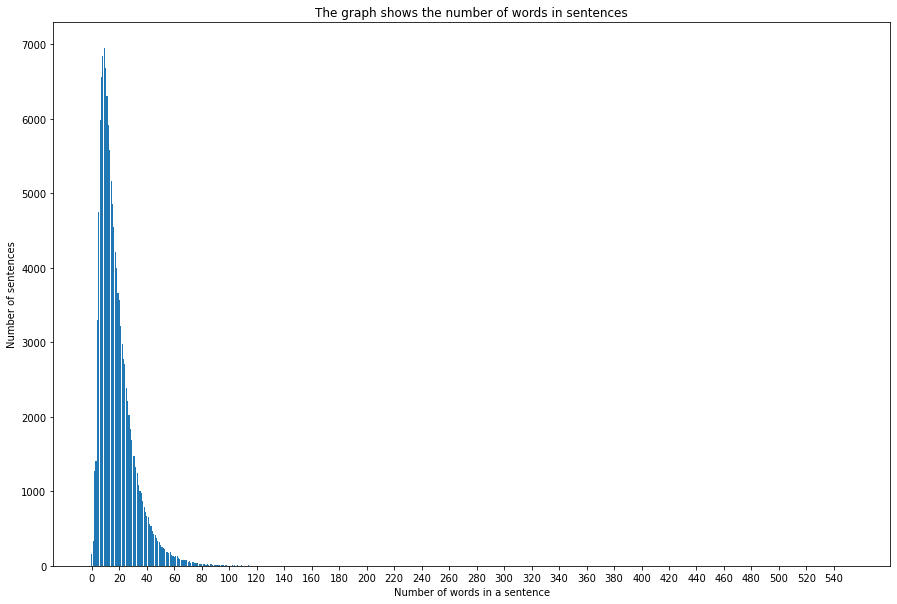

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

count_words_en = df_train['Count (En)']
counter_words_en = Counter(count_words_en)

list_count_word = []
list_count_sent = []
for i in counter_words_en.items():
    #print(i)
    list_count_word.append(i[0])
    list_count_sent.append(i[1])
    
# ========== draw ========== #
plt.figure(figsize=(15,10))
plt.bar(list_count_word,list_count_sent)
plt.title('The graph shows the number of words in sentences')
plt.xlabel('Number of words in a sentence')
plt.ylabel('Number of sentences')
plt.xticks(range(min(list_count_word), max(list_count_word),20))
plt.show()

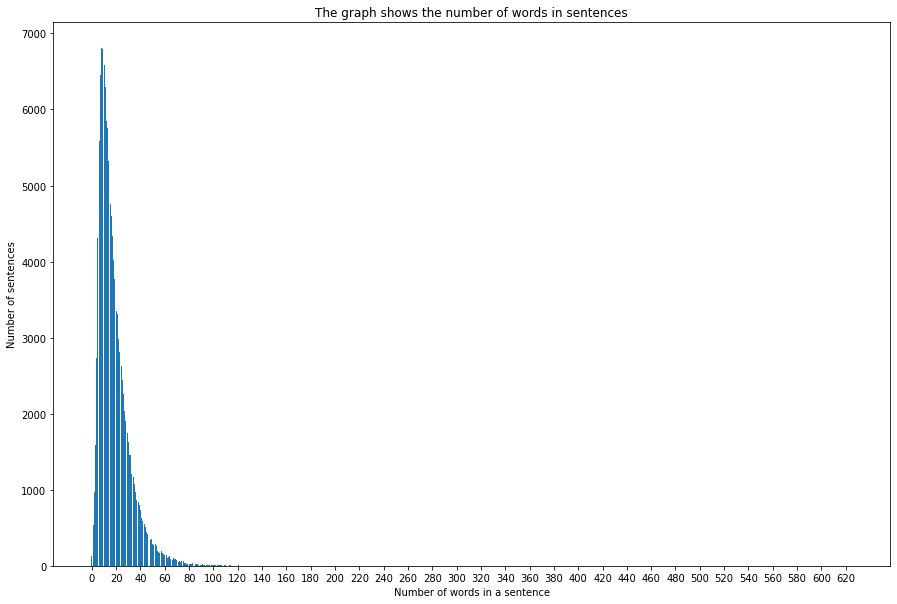

In [ ]:
count_words_vi = df_train['Count (Vi)']
counter_words_vi = Counter(count_words_vi)

list_count_word = []
list_count_sent = []
for i in counter_words_vi.items():
    #print(i)
    list_count_word.append(i[0])
    list_count_sent.append(i[1])
    
# ========== draw ========== #
plt.figure(figsize=(15,10))
plt.bar(list_count_word,list_count_sent)
plt.title('The graph shows the number of words in sentences')
plt.xlabel('Number of words in a sentence')
plt.ylabel('Number of sentences')
plt.xticks(range(min(list_count_word), max(list_count_word),20))
plt.show()

In [ ]:
MAX_LENGTH = 60

In [ ]:
df_train = df_train[(df_train['Count (En)'] <= MAX_LENGTH) & (df_train['Count (En)'] > 0) & (df_train['Count (Vi)'] <= MAX_LENGTH) & (df_train['Count (Vi)'] > 0)]
df_train

,English,Vietnamese,Count (En),Count (Vi)
0,rachel pike the science behind a climate headline,khoa_học đằng sau một tiêu_đề về khí_hậu,8,7
1,in 4 minutes atmospheric chemist rachel pike p...,trong 4 phút chuyên_gia hoá_học khí_quyển rach...,45,50
2,i aposd like to talk to you today about the sc...,tôi muốn cho các bạn biết về sự to_lớn của nhữ...,26,24
3,headlines that look like this when they have t...,có những dòng trông như thế này khi bàn về biế...,29,24
4,they are both two branches of the same field o...,cả hai đều là một nhánh của cùng một lĩnh_vực ...,12,14
...,...,...,...,...
133310,nelson mandela said in the mid2000s not too fa...,nelson maldela từng nói giữa những năm 2000 kh...,23,24
133311,it aposs manmade and can be overcome and eradi...,nó là do con_người và có_thể ngăn_chặn và diệt...,16,14
133312,i want to end by saying it aposs been the acti...,tôi muốn kết_luận rằng hành_động của hàng ngàn...,36,30
133313,thank you very much for your time,rất cảm_ơn đã lắng_nghe,7,4


# 2. Xử lý dữ liệu

In [ ]:
# Tải thư viện transformer
!git clone https://github.com/huggingface/transformers.git --quiet

In [ ]:
# Cập nhật thư viện transformer
!pip3 install --upgrade ./transformers/ --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 89.4 MB/s eta 0:00:00


## 2.1 Transform text thành vec cho tiếng Việt

In [ ]:
# Import Thư viện
from transformers import AutoTokenizer, BertTokenizer

In [ ]:
tokenizer_vi = AutoTokenizer.from_pretrained("vinai/phobert-base")
print('Vietnamese vocab size: ', tokenizer_vi.vocab_size)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Vietnamese vocab size:  64000


In [ ]:
# In ra thử trên một câu mẫu
sent = "Tôi là người Việt Nam"
# encode text thành vec
input_ids = tokenizer_vi.encode(sent) # already include BOS and EOS
print(input_ids)
# decode vec thành text
print(tokenizer_vi.decode(input_ids))

[0, 218, 8, 18, 350, 590, 2]
<s> Tôi là người Việt Nam </s>


## 2.2 Transform text thành vec cho tiếng Anh

In [ ]:
tokenizer_en = BertTokenizer.from_pretrained("bert-base-cased")

special_tokens = {'cls_token': '<s>', 'sep_token': '</s>'}
tokenizer_en.add_special_tokens(special_tokens_dict=special_tokens)

print('English vocab size: ', tokenizer_en.vocab_size)

English vocab size:  28996


In [ ]:
# In ra thử trên một câu mẫu
sent = "he remains characteristically confident and optimistic ."
input_ids = tokenizer_en.encode(sent)
print(input_ids)

input_ids = tokenizer_en.encode_plus(text=sent, truncation=True, max_length=MAX_LENGTH)
print(tokenizer_en.decode(input_ids.input_ids))

[28996, 1119, 2606, 7987, 2716, 9588, 1105, 24876, 119, 28997]
<s> he remains characteristically confident and optimistic. </s>


## 2.3 Đưa source và target data vào tensor slice

In [ ]:
print(df_train['English'].values[:2])
print(len(df_train['English'].values))

['rachel pike the science behind a climate headline'
 'in 4 minutes atmospheric chemist rachel pike provides a glimpse of the massive scientific effort behind the bold headlines on climate change with her team one of thousands who contributed taking a risky flight over the rainforest in pursuit of data on a key molecule']
130912


In [ ]:
length_data = len(df_train['English'].values)
en_raw, vi_raw = df_train['English'].values[:length_data], df_train['Vietnamese'].values[:length_data]

In [ ]:
from tqdm.notebook import tqdm

source = []
target = []

total=len(en_raw)
bar = tqdm(total=total)

for x,y in zip (en_raw, vi_raw):
    element = []
    for tex in tf.data.Dataset.from_tensor_slices([x,y]):
        element.append(tex)
    source.append(element[0])
    target.append(element[1])
    
    bar.update(1)

  0%|          | 0/130912 [00:00<?, ?it/s]

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((source, target))
dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [ ]:
# In kiểm tra dữ liệu
for en, vi in dataset:
  print('en: ', en.numpy().decode('utf-8'))
  print('encode: ', tokenizer_en.encode_plus(en.numpy().decode('utf-8'), max_length=MAX_LENGTH, truncation=True).input_ids)

  print('vi: ', vi.numpy().decode('utf-8'))
  print('encode: ', tokenizer_vi.encode_plus(vi.numpy().decode('utf-8'), max_length=MAX_LENGTH, truncation=True).input_ids)
  break

en:  rachel pike the science behind a climate headline
encode:  [28996, 187, 12804, 1233, 185, 13012, 1103, 2598, 1481, 170, 4530, 21188, 28997]
vi:  khoa_học đằng sau một tiêu_đề về khí_hậu
encode:  [0, 457, 3864, 53, 16, 11752, 28, 2299, 2]


# 4. Lọc và đưa các vector dữ liệu thành cùng 1 size

In [ ]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

In [ ]:
# quan trọng: source với target đã vào trong dataset

In [ ]:
# Đưa dữ liệu về cùng 1 size
def encode(lang_en, lang_vi):
  lang_en = tokenizer_en.encode_plus(lang_en.numpy().decode('utf-8'), max_length=MAX_LENGTH, truncation=True)
  lang_vi = tokenizer_vi.encode_plus(lang_vi.numpy().decode('utf-8'), max_length=MAX_LENGTH, truncation=True)
  return lang_en.input_ids, lang_vi.input_ids


def tf_encode(en, vi):
  result_en, result_vi = tf.py_function(encode, [en, vi], [tf.int64, tf.int64])

  result_en.set_shape([None]) # set None: allow any value for that axis
  result_vi.set_shape([None])

  return result_en, result_vi

# lọc dữ liệu có độ dài nhỏ hơn hoặc bằng MAX_LENGTH thì lấy
def filter_max_length(x, y, max_length=MAX_LENGTH):
  return tf.logical_and(tf.size(x) <= max_length, tf.size(y) <= max_length)

In [ ]:
train_dataset = dataset.map(tf_encode)
train_dataset = train_dataset.filter(filter_max_length)

train_dataset = train_dataset.cache()
train_dataset = train_dataset.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

# 5. Positional Encoding

In [ ]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [ ]:
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
  pos_encoding = angle_rads[np.newaxis, ...]
    
  return tf.cast(pos_encoding, dtype=tf.float32)

In [ ]:
def create_padding_mask(seq):
  seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
  
  # add extra dimensions to add the padding
  # to the attention logits.
  return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [ ]:
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask  # (seq_len, seq_len)

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
  """Calculate the attention weights.
  q, k, v must have matching leading dimensions.
  k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
  The mask has different shapes depending on its type(padding or look ahead) 
  but it must be broadcastable for addition.
  
  Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable 
          to (..., seq_len_q, seq_len_k). Defaults to None.
    
  Returns:
    output, attention_weights
  """

  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
  
  # scale matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # add the mask to the scaled tensor.
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)  

  # softmax is normalized on the last axis (seq_len_k) so that the scores
  # add up to 1.
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights

# 6. Multihead Attention

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)

    self.dense = tf.keras.layers.Dense(d_model)

  def split_heads(self, x, batch_size):
    """Split the last dimension into (num_heads, depth).
    Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])

  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]

    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)

    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)

    return output, attention_weights

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
  return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
  ])

# 7. Encoder and Decoder

## 7.1 Encoder

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    
  def call(self, x, training, mask):

    attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
    attn_output = self.dropout1(attn_output, training=training)
    out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)
    
    ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
    ffn_output = self.dropout2(ffn_output, training=training)
    out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)
    
    return out2

In [ ]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Encoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    
    self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, 
                                            self.d_model)
    
    
    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
  
    self.dropout = tf.keras.layers.Dropout(rate)
        
  def call(self, x, training, mask):

    seq_len = tf.shape(x)[1]
    
    # adding embedding and position encoding.
    x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)
    
    for i in range(self.num_layers):
      x = self.enc_layers[i](x, training, mask)
      # x = tf.math.add(x, self.enc_layers[i](x, training, mask))
    
    return x  # (batch_size, input_seq_len, d_model)

In [ ]:
# For testing only
sample_encoder = Encoder(num_layers=4, d_model=128, num_heads=8,
                         dff=512, input_vocab_size=tokenizer_en.vocab_size,
                         maximum_position_encoding=10000)
temp_input = tf.random.uniform((64, 62), dtype=tf.int64, minval=0, maxval=200)

sample_encoder_output = sample_encoder(temp_input, training=False, mask=None)

print(sample_encoder_output.shape)  # (batch_size, input_seq_len, d_model)

(64, 62, 128)


## 7.2 Decoder

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(DecoderLayer, self).__init__()

    self.mha1 = MultiHeadAttention(d_model, num_heads)
    self.mha2 = MultiHeadAttention(d_model, num_heads)

    self.ffn = point_wise_feed_forward_network(d_model, dff)
 
    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):
    # enc_output.shape == (batch_size, input_seq_len, d_model)

    attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
    attn1 = self.dropout1(attn1, training=training)
    out1 = self.layernorm1(attn1 + x)
    
    attn2, attn_weights_block2 = self.mha2(
        enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
    attn2 = self.dropout2(attn2, training=training)
    out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)
    
    ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
    ffn_output = self.dropout3(ffn_output, training=training)
    out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)
    
    return out3, attn_weights_block1, attn_weights_block2

In [ ]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    
    self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)
    
    self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(rate)
    
  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):

    seq_len = tf.shape(x)[1]
    attention_weights = {}
    
    x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]
    
    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                             look_ahead_mask, padding_mask)
      
      attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
      attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    
    # x.shape == (batch_size, target_seq_len, d_model)
    return x, attention_weights

# Create model Transformer

In [ ]:
class Transformer(tf.keras.Model):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               target_vocab_size, pe_input, pe_target, rate=0.1):
    super(Transformer, self).__init__()

    self.encoder = Encoder(num_layers, d_model, num_heads, dff, 
                           input_vocab_size, pe_input, rate)

    self.decoder = Decoder(num_layers, d_model, num_heads, dff, 
                           target_vocab_size, pe_target, rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
  def call(self, inp, tar, training, enc_padding_mask, 
           look_ahead_mask, dec_padding_mask):

    enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)
    
    # dec_output.shape == (batch_size, tar_seq_len, d_model)
    dec_output, attention_weights = self.decoder(
        tar, enc_output, training, look_ahead_mask, dec_padding_mask)
    
    final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)
    
    return final_output, attention_weights

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    
    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps
    
  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps** -1.5)
    
    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

# Hyperparameter

In [ ]:
config_params = {
    'num_layers': 6,
    'd_model': 128,
    'dff': 512,
    'num_heads': 8,
    'input_vocab_size': tokenizer_en.vocab_size + 2,
    'target_vocab_size': tokenizer_vi.vocab_size + 2,
    'dropout_rate': 0.1
}

In [ ]:
learning_rate = CustomSchedule(config_params['d_model'])

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate(2e-5), beta_1=0.9, beta_2=0.98, epsilon=1e-9)

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [ ]:
def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask
  
  return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
    name='train_accuracy')

In [ ]:
def create_model(configs):
  return Transformer(configs['num_layers'], 
                     configs['d_model'],
                     configs['num_heads'],
                     configs['dff'],
                     configs['input_vocab_size'],
                     configs['target_vocab_size'], 
                     pe_input=configs['input_vocab_size'], 
                     pe_target=configs['target_vocab_size'],
                     rate=configs['dropout_rate'])

In [ ]:
# Create model
transformer = create_model(config_params)

In [ ]:
def create_masks(inp, tar):
  # Encoder padding mask
  enc_padding_mask = create_padding_mask(inp)
  
  # Used in the 2nd attention block in the decoder.
  # This padding mask is used to mask the encoder outputs.
  dec_padding_mask = create_padding_mask(inp)
  
  # Used in the 1st attention block in the decoder.
  # It is used to pad and mask future tokens in the input received by 
  # the decoder.
  look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
  dec_target_padding_mask = create_padding_mask(tar)
  combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
  
  return enc_padding_mask, combined_mask, dec_padding_mask

# 8. Huấn luyện model

## 8.1 Tạo model checkpoint

In [ ]:
MODEL_PATH = '/model_checkpoint/'

In [ ]:
checkpoint_path = os.path.join(MODEL_PATH, 'checkpoint_transformer')

ckpt = tf.train.Checkpoint(transformer=transformer, optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print ('Latest checkpoint restored!!')

Latest checkpoint restored!!


## 8.2 Huấn luyện model

In [ ]:
EPOCHS = 15

In [ ]:
# The @tf.function trace-compiles train_step into a TF graph for faster
# execution. The function specializes to the precise shape of the argument
# tensors. To avoid re-tracing due to the variable sequence lengths or variable
# batch sizes (the last batch is smaller), use input_signature to specify
# more generic shapes.

train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]

@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
  tar_inp = tar[:, :-1]
  tar_real = tar[:, 1:]
  
  enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)
  
  with tf.GradientTape() as tape:
    predictions, _ = transformer(inp, tar_inp, 
                                 True, 
                                 enc_padding_mask, 
                                 combined_mask, 
                                 dec_padding_mask)
    loss = loss_function(tar_real, predictions)

  gradients = tape.gradient(loss, transformer.trainable_variables)    
  optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
  
  train_loss(loss)
  train_accuracy(tar_real, predictions)

In [ ]:
# 3rd attempt
loss_epochs = []
start_train = time.time()
for epoch in range(EPOCHS):
  start = time.time()
  
  train_loss.reset_states()
  train_accuracy.reset_states()
  

  for (batch, (en, vn)) in enumerate(train_dataset):
    train_step(en, vn)
    
    if batch % 300 == 0:
      print ('Epoch {} Batch {} Loss {:.4f} Accuracy {:.4f}'.format(
          epoch + 1, batch, train_loss.result(), train_accuracy.result()))
      
  if ((epoch + 1) % 5 == 0): # Save checkpoint for every 5 epochs
    ckpt_save_path = ckpt_manager.save()
    print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))
    
  print ('Epoch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1, 
                                                train_loss.result(), 
                                                train_accuracy.result()))
  loss_epochs.append(train_loss.result())
  print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))
time_train = time.time() - start_train
print('Time training for model: {} secs'.format(time_train))

Epoch 1 Batch 0 Loss 7.0332 Accuracy 0.0053
Epoch 1 Batch 300 Loss 5.5054 Accuracy 0.0679
Epoch 1 Batch 600 Loss 4.6505 Accuracy 0.1048
Epoch 1 Batch 900 Loss 4.1698 Accuracy 0.1255
Epoch 1 Batch 1200 Loss 3.8544 Accuracy 0.1386
Epoch 1 Batch 1500 Loss 3.6307 Accuracy 0.1477
Epoch 1 Batch 1800 Loss 3.4732 Accuracy 0.1538
Epoch 1 Loss 3.3703 Accuracy 0.1577
Time taken for 1 epoch: 719.4112253189087 secs

Epoch 2 Batch 0 Loss 2.7011 Accuracy 0.1965
Epoch 2 Batch 300 Loss 2.4787 Accuracy 0.1934
Epoch 2 Batch 600 Loss 2.4423 Accuracy 0.1950
Epoch 2 Batch 900 Loss 2.4267 Accuracy 0.1954
Epoch 2 Batch 1200 Loss 2.4084 Accuracy 0.1963
Epoch 2 Batch 1500 Loss 2.3917 Accuracy 0.1971
Epoch 2 Batch 1800 Loss 2.3885 Accuracy 0.1971
Epoch 2 Loss 2.3862 Accuracy 0.1969
Time taken for 1 epoch: 530.5538506507874 secs

Epoch 3 Batch 0 Loss 2.4604 Accuracy 0.1923
Epoch 3 Batch 300 Loss 2.2628 Accuracy 0.2012
Epoch 3 Batch 600 Loss 2.2520 Accuracy 0.2017
Epoch 3 Batch 900 Loss 2.2454 Accuracy 0.2023
Epoc

# 9. Đánh giá

## 9.1 Khởi tạo các hàm đánh giá

In [ ]:
def evaluate(inp_sentence):
  start_token = [tokenizer_en.cls_token_id] # [tokenizer_en.vocab_size]
  end_token = [tokenizer_en.sep_token_id] # # [tokenizer_en.vocab_size + 1]
  
  # inp sentence is english, hence adding the start and end token
  inp_sentence = tokenizer_en.encode(inp_sentence)
  encoder_input = tf.expand_dims(inp_sentence, 0)

  # as the target is vietnamese, the first word to the transformer should be the
  # vietnamese start token.
  ## decoder_input = [tokenizer_vn.vocab_size] # <start>
  decoder_input = [tokenizer_vi.bos_token_id]
  output = tf.expand_dims(decoder_input, 0)
    
  for i in range(MAX_LENGTH):
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(
        encoder_input, output)
  
    # predictions.shape == (batch_size, seq_len, vocab_size)
    predictions, attention_weights = transformer(encoder_input, 
                                                 output,
                                                 False,
                                                 enc_padding_mask,
                                                 combined_mask,
                                                 dec_padding_mask)
    
    # select the last word from the seq_len dimension
    predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)

    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
    
    # return the result if the predicted_id is equal to the end token
    if predicted_id == tokenizer_vi.eos_token_id:
      return tf.squeeze(output, axis=0), attention_weights
    
    # concatentate the predicted_id to the output which is given to the decoder
    # as its input.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0), attention_weights

def preprocess(sentence):
  return re.sub(r'[.!?\\-]', '', sentence.lower())

def translate_val(sentence):
  clean_sentence = preprocess(sentence)
  result, attention_weights = evaluate(clean_sentence)  
  predicted_sentence = tokenizer_vi.decode(result)
  predicted_sentence = predicted_sentence.replace(tokenizer_vi.bos_token + ' ', '')
  return predicted_sentence

## 9.2 Đánh giá model trên bộ dữ liệu test

# 9.2.1 Tạo dữ liệu để đánh giá

In [ ]:
#2012
%%time
# Predict all test data
# Write all predict into files
predicted2012 = []
start_test_2012 = time.time()

for i in range(len(df_tst2012)):
  pred = translate_val(df_tst2012.iloc[i]['English'])
  if (i+1) % 150 == 0:
    print('index: {}'.format(i+1))
    print('eng: :', df_tst2012.iloc[i]['English'])
    print('vi actual: ', df_tst2012.iloc[i]['Vietnamese'])
    print('vi predicted: ', pred)
  predicted2012.append(pred)

time_test_2012 = time.time() - start_test_2012
df_tst2012['Predicted vietnamese'] = predicted2012
df_tst2012.to_csv('/translated/model_transformer_BERT_PhoBERT_with_test_2012.csv', encoding='utf-8', index=False)

index: 150
eng: : and my grandmother was sitting across the room staring at me
vi actual:  bà tôi thì đang ngồi đối_diện nhìn tôi chằm_chằm
vi predicted:  và bà tôi ngồi quanh phòng nhìn chằm_chằm vào tôi
index: 300
eng: : and she aposd say quot well what are you going to do when you get here quot
vi actual:  bà ấy hỏi quot vậy cậu dự_định sẽ làm gì khi đến đây quot
vi predicted:  quot à bạn sẽ làm gì khi bạn đến đây quot
index: 450
eng: : and this boat quite ugly is called the mutiara 4
vi actual:  và cái thuyền này đây khá xấu được gọi là mutiara 4
vi predicted:  thật là xấu_xí chiếc thuyền này được gọi là 4 viên thuốc chữa lành
index: 600
eng: : and it turns out that making it feel more concrete can actually be a very positive tool to use in getting people to save more
vi actual:  và điều đó chỉ ra rằng làm nó càng rõ_ràng cụ_thể thì càng trở_thành 1 công_cụ hiệu_quả để giúp mọi người tiết_kiệm hơn
vi predicted:  vì nó chỉ ra rằng làm nó cảm_giác cụ_thể hơn có_thể là một công_cụ tíc

In [ ]:
#2013 
%%time
# Predict all test data
# Write all predict into files
predicted2013 = []
start_test_2013 = time.time()

for i in range(len(df_tst2013)):
  pred = translate_val(df_tst2013.iloc[i]['English'])
  if (i+1) % 150 == 0:
    print('index: {}'.format(i+1))
    print('eng: :', df_tst2013.iloc[i]['English'])
    print('vi actual: ', df_tst2013.iloc[i]['Vietnamese'])
    print('vi predicted: ', pred)
  predicted2013.append(pred)

time_test_2013 = time.time() - start_test_2013
df_tst2013['Predicted vietnamese'] = predicted2013
df_tst2013.to_csv('/translated/model_transformer_BERT_PhoBERT_with_test_2013.csv', encoding='utf-8', index=False)

index: 150
eng: : it aposs a porous asphalt like i said so you have only a small amount of binder between the stones
vi actual:  nó là nhựa xốp như tôi đã nói bạn chỉ có một lượng nhỏ keo dính bám giữa các viên đá
vi predicted:  bằng cách tôi nói vậy nên bạn chỉ có một lượng nhỏ gắn_kết giữa các viên đá
index: 300
eng: : because mps do not keep the environment clean
vi actual:  vì quân_cảnh không giữ cho môi_trường trong_sạch
vi predicted:  mops không giữ cho môi_trường sạch
index: 450
eng: : but then after a while i realized this is my life
vi actual:  nhưng sau đó tôi đã nhận ra đây là toàn_bộ cuộc_sống của mình
vi predicted:  vì sau một thời_gian tôi nhận ra đây là cuộc_đời tôi
index: 600
eng: : and so scientists and engineers when you aposve solved this equation by all means talk nerdy to me
vi actual:  và do đó hỡi các nhà khoa_học và kĩ_sư khi các anh giải phương_trình này bằng mọi giá hãy nói tám chuyện phiếm với tôi
vi predicted:  và các nhà khoa_học và kỹ_sư khi bạn đã giải_qu

# 9.2.2 Đánh giá model bằng độ đo BLEU score

In [ ]:
import nltk
from nltk.translate.bleu_score import SmoothingFunction
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

In [ ]:
def custom_bleu_score(refs, hypothesis):
  TotalBLEUscore = 0
  for i in range(len(refs)):
    BLEUscore = sentence_bleu(refs[i], hypothesis[i], smoothing_function=SmoothingFunction().method1)
    TotalBLEUscore += BLEUscore
  return TotalBLEUscore / len(refs)

# y_preds: list
# y_actuals: list
def bleu_score(x_test, y_test):
  BLEUScore = 0
  X_test = [sentence.split(' ') for sentence in x_test] # hypothesis - candidates
  Y_test = [[sentence.split(' ')] for sentence in y_test] # refs
  BLEUScore = custom_bleu_score(Y_test, X_test)
  return BLEUScore

print(df_tst2013.iloc[0]['English'])
print()
print(df_tst2013.iloc[0]['Vietnamese'])
print(df_tst2013.iloc[0]['Predicted vietnamese'])

when i was little i thought my country was the best on the planet and i grew up singing a song called quot nothing to envy quot

khi tôi còn nhỏ tôi nghĩ rằng bắctriều tiên là đất_nước tốt nhất trên thế_giới và tôi thường hát bài quot chúng_ta chẳng có gì phải ghen_tị quot
vì tôi nghĩ rằng đất_nước tôi là người tốt nhất trên hành_tinh tôi hát một bài hát được gọi là quot không có gì để ghen_tị quot


In [ ]:
%%time
tst, actual = df_tst2012['Vietnamese'], df_tst2012['Predicted vietnamese']

bleu_on_test_12 = bleu_score(tst, actual)
print("Avg BLEU score (2013): ", bleu_on_test_12)

Avg BLEU score (2013):  0.10844876540697293
CPU times: user 503 ms, sys: 9.91 ms, total: 512 ms
Wall time: 770 ms


In [ ]:
%%time
tst, actual = df_tst2013['Vietnamese'], df_tst2013['Predicted vietnamese']

bleu_on_test_13 = bleu_score(tst, actual)
print("Avg BLEU score (2013): ", bleu_on_test_13)

Avg BLEU score (2013):  0.13180880668472233
CPU times: user 470 ms, sys: 11 ms, total: 481 ms
Wall time: 507 ms


In [ ]:
import json
dict_model = {'time_train': time_train,
              'time_test_2012': time_test_2012,
              'time_test_2013': time_test_2013,
              'bleu_on_test_12': bleu_on_test_12,
              'bleu_on_test_13': bleu_on_test_13,
              'loss_epochs': loss_epochs}

json = json.dumps(dict_model)
f = open("/value_comparison_of_models/by_model_transformer_BERT_PhoBERT.json","w")
f.write(json)
f.close()
dict_model

{'bleu_on_test_12': 0.10844876540697293,
 'bleu_on_test_13': 0.13180880668472233,
 'loss_epochs': [3.3703,
  2.3862,
  2.2532,
  2.1926,
  2.1548,
  2.1258,
  2.102,
  2.0829,
  2.0668,
  2.0516,
  2.0377,
  2.0242,
  2.0122,
  1.9983,
  1.9876],
 'time_test_2012': 4620.91237192873,
 'time_test_2013': 5693.868042945862,
 'time_train': 8149.387919425964}

# 10. Hiện thực

In [ ]:
def translate(sentence, plot=''):
  clean_sentence = preprocess(sentence) # pre-process input
  result, attention_weights = evaluate(clean_sentence)
  predicted_sentence = tokenizer_vi.decode(result)

  predicted_sentence = predicted_sentence.replace(tokenizer_vi.bos_token + ' ', '')
  print('Input: {}'.format(clean_sentence))
  print('Predicted translation: {}'.format(predicted_sentence))
  print()

In [ ]:
%%time
translate("The science behind a climate headline")

Input: the science behind a climate headline
Predicted translation: đằng sau tiêu_đề khí_hậu

CPU times: user 1.8 s, sys: 45.7 ms, total: 1.84 s
Wall time: 1.96 s


In [ ]:
%%time
translate("Thank you very much for your time")

Input: thank you very much for your time
Predicted translation: vì cảm_ơn các bạn rất nhiều vì thời_gian

CPU times: user 3.24 s, sys: 56.5 ms, total: 3.29 s
Wall time: 3.42 s


In [ ]:
%%time
translate("They are both two branches of the same field")

Input: they are both two branches of the same field
Predicted translation: đều là hai nhánh của cùng một lĩnh_vực

CPU times: user 3.11 s, sys: 63.8 ms, total: 3.17 s
Wall time: 4.17 s
